In [71]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r'C:\Users\Admin\Desktop\data science assighnments\KNN (1)\KNN\Zoo.csv')

In [3]:
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [4]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [5]:
df.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [6]:
df.dtypes

animal name    object
hair            int64
feathers        int64
eggs            int64
milk            int64
airborne        int64
aquatic         int64
predator        int64
toothed         int64
backbone        int64
breathes        int64
venomous        int64
fins            int64
legs            int64
tail            int64
domestic        int64
catsize         int64
type            int64
dtype: object

In [48]:
# Instantiate LabelEncoder
encoder = LabelEncoder()


In [51]:
# Encode the class labels (animal names)
df['animal name'] = encoder.fit_transform(df['animal name'])


In [52]:
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type,class_encoded
0,0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,0
1,1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1,1
2,2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4,2
3,3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,3
4,4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1,4


In [11]:
df.columns

Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')

In [53]:
# Features (X) and Target (y)
X = df[['animal name','backbone','venomous','fins','aquatic','legs','feathers', 'tail']]  # Features
y = df['type']  # Target (class label)



In [54]:
# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [55]:
# Standardize the features (important for KNN to avoid distance bias)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [67]:

# Initialize and train the KNN classifier (let's use k=1)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)


KNeighborsClassifier()

In [68]:
# Make predictions
y_pred = knn.predict(X_test_scaled)


In [69]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # for multi-class classification
recall = recall_score(y_test, y_pred, average='weighted')  # for multi-class classification
f1 = f1_score(y_test, y_pred, average='weighted')  # for multi-class classification


In [70]:

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Accuracy: 0.90
Precision: 0.94
Recall: 0.90
F1-Score: 0.91


In [64]:
# Try different k values and check cross-validated accuracy
k_range = range(1, 21)
k_scores = []


In [65]:
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())


In [66]:
best_k = k_range[np.argmax(k_scores)]
print(f"Best k: {best_k}")

Best k: 5


In [74]:
# Features and target
X = df[['legs', 'feathers']]  # Select only two features for visualization
y = df['type']  # Target variable (class)


In [75]:
# Encode the class labels (animal names)
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)


In [76]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


In [77]:

# Standardizing the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [84]:

# Train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_scaled, y_train)


KNeighborsClassifier(n_neighbors=1)

In [85]:
# Create a mesh grid for plotting decision boundaries
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))


In [86]:

# Predict the class for each point in the grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


In [87]:
# Plot the decision boundary
plt.figure(figsize=(8, 6))


<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

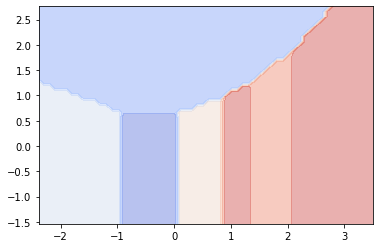

In [88]:
# Plot the decision boundary by coloring the regions
plt.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')


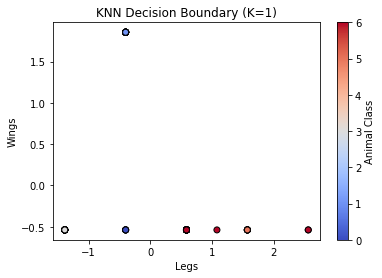

In [90]:
# Scatter plot of the actual data points
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap='coolwarm', edgecolors='k', marker='o')
plt.title("KNN Decision Boundary (K=1)")
plt.xlabel('Legs')
plt.ylabel('Wings')
plt.colorbar(label='Animal Class')
plt.show()

Interview Questions:- 
1. n_neighbors: Start with values like 3, 5, 7, 10.
   weights: Test both uniform and distance to see which works best.
   algorithm: Use auto by default, but consider ball_tree or kd_tree for large datasets.
   metric: euclidean is a good default, but you can experiment with manhattan or others depending on your data.

In [ ]:
2. Euclidean Distance (L2 Norm)
   Manhattan Distance (L1 Norm)
   Minkowski Distance (Generalized Version)
   Cosine Similarity
   Hamming Distance